# Importing Libraries

In [1]:
# loading libraries
# keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras import regularizers
from keras.datasets import fashion_mnist
from keras.layers.normalization import BatchNormalization

# sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Task 2

In [2]:
# preparing fashion - MNIST Dataset
(X_train_val, y_train_val), (X_test, y_test) = fashion_mnist.load_data()
X_train_val = X_train_val.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train_val = X_train_val.astype('float32')
X_test = X_test.astype('float32')
X_train_val /= 255
X_test /= 255
print(X_train_val.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
num_classes = 10
# convert class vectors to binary class matrices
y_train_val = keras.utils.to_categorical(y_train_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

4423680/4422102 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 10000, shuffle = True, stratify = y_train_val)

In [4]:
X_val.shape

(10000, 784)

In [0]:
# creating an initial multilayer perceptron (2 hidden layers)
def create_model(hidden_size = 64):  
  model = Sequential([
      Dense(hidden_size, input_shape=(784,)),
      Activation('relu'),
      Dense(int(hidden_size/2)),
      Activation('relu'),
      Dense(10),
      Activation('softmax')])

  model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
  return model

In [0]:
model = create_model()

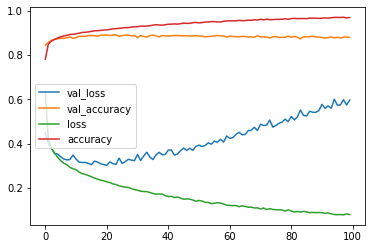

In [7]:
history_callback = model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size=128,
                             epochs=100, verbose=0)
df = pd.DataFrame(history_callback.history)
df.plot()

Text(0.5, 1.05, 'Example of Test set')

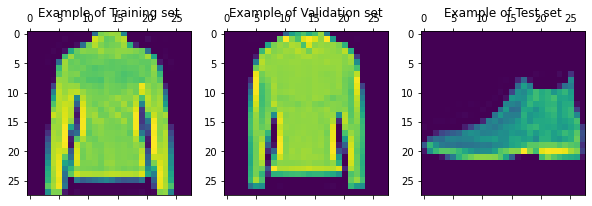

In [8]:
fig, axs = plt.subplots(1,3, figsize = (10,5))

axs[0].matshow(X_train[0].reshape(28, 28)) 
axs[0].set_title('Example of Training set')

axs[1].matshow(X_val[0].reshape(28, 28)) 
axs[1].set_title('Example of Validation set')

axs[2].matshow(X_test[0].reshape(28, 28)) 
axs[2].set_title('Example of Test set')

In [33]:
# creating a "Vanilla" model with one hidden layer
def create_model_vanilla(hidden_size = 128):  
  model = Sequential([
      Dense(hidden_size, input_shape=(784,)),
      Activation('relu'),
      Dense(10),
      Activation('softmax')])

  model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
  return model
model1 = create_model_vanilla()
model1.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
50000/50000 [==============================] - 1s 23us/step - loss: 0.5768 - accuracy: 0.8021
Epoch 2/10
50000/50000 [==============================] - 1s 22us/step - loss: 0.4174 - accuracy: 0.8551
Epoch 3/10
50000/50000 [==============================] - 1s 24us/step - loss: 0.3743 - accuracy: 0.8673
Epoch 4/10
50000/50000 [==============================] - 1s 23us/step - loss: 0.3496 - accuracy: 0.8755
Epoch 5/10
50000/50000 [==============================] - 1s 22us/step - loss: 0.3309 - accuracy: 0.8812
Epoch 6/10
50000/50000 [==============================] - 1s 21us/step - loss: 0.3147 - accuracy: 0.8866
Epoch 7/10
50000/50000 [==============================] - 1s 24us/step - loss: 0.3020 - accuracy: 0.8903
Epoch 8/10
50000/50000 [==============================] - 1s 25us/step - loss: 0.2922 - accuracy: 0.8935
Epoch 9/10
50000/50000 [==============================] - 1s 22us/step - loss: 0.2822 - accuracy: 0.8972
Epoch 10/10
50000/50000 [==============================

In [0]:
history_callback = model1.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=128,
                             epochs=100, verbose=0)
df1 = pd.DataFrame(history_callback.history)

In [11]:
# now creating a model using dropout in the visible layer
def create_model_dropout(hidden_size = 64):  
  model = Sequential([
      # first visible layer with DropOut
      Dropout(0.5, input_shape=(784,)),
      # first hidden layer       
      Dense(hidden_size),
      Activation('relu'),
      # output layer
      Dense(10),
      Activation('softmax')])

  model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
  return model
model2 = create_model_dropout()

In [0]:
history_callback = model2.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size=128,
                             epochs=100, verbose=0)
df2 = pd.DataFrame(history_callback.history)

In [0]:
# now creating a model using dropout in the hidden layer
def create_model_dropout1(hidden_size = 32):  
  model = Sequential([
      Dense(hidden_size, input_shape=(784,)),
      Activation('relu'),
      Dropout(0.5),
      # added dropout in the first hidden layer
      Dense(10),
      Activation('softmax')])

  model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
  return model
model3 = create_model_dropout1()

In [0]:
history_callback = model3.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size=128,
                             epochs=100, verbose=0)
df3 = pd.DataFrame(history_callback.history)

In [0]:
# adding extra hidden layers for dropout & increasing the hidden layer size to 128
def create_model_dropout2(hidden_size = 128):  
  model = Sequential([
      Dense(hidden_size, input_shape=(784,)),
      Activation('relu'),
      Dropout(0.2),
      Dense(int(hidden_size/2)),
      Activation('relu'),
      Dropout(0.25),
      Dense(int(hidden_size/4)),
      Activation('relu'),
      Dropout(0.2),
      Dense(10),
      Activation('softmax')])

  model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
  return model
model4 = create_model_dropout2()

In [0]:
history_callback = model4.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=128,
                             epochs=100, verbose=0)
df4 = pd.DataFrame(history_callback.history)

In [0]:
# same dropout model, but now removing the dropout 
def create_model_wo_dropout(hidden_size = 128):  
  model = Sequential([
      Dense(hidden_size, input_shape=(784,)),
      Activation('relu'),
      # Dropout(0.2),
      Dense(int(hidden_size/2)),
      Activation('relu'),
      # Dropout(0.25),
      Dense(int(hidden_size/4)),
      Activation('relu'),
      # Dropout(0.2),
      Dense(10),
      Activation('softmax')])

  model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
  return model
model5 = create_model_wo_dropout()

In [0]:
history_callback = model5.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size=128,
                             epochs=100, verbose=0)
df5 = pd.DataFrame(history_callback.history)

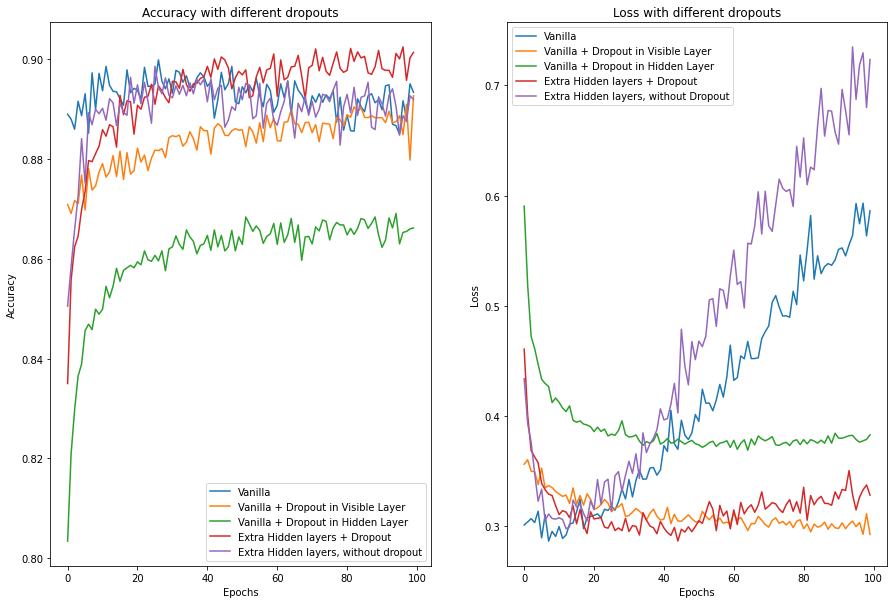

In [35]:
fig, axs = plt.subplots(1,2, figsize = (15,10))

df1['val_accuracy'].plot(ax = axs[0], label = 'Vanilla')
df2['val_accuracy'].plot(ax = axs[0], label = 'Vanilla + Dropout in Visible Layer')
df3['val_accuracy'].plot(ax = axs[0], label = 'Vanilla + Dropout in Hidden Layer')
df4['val_accuracy'].plot(ax = axs[0], label = 'Extra Hidden layers + Dropout')
df5['val_accuracy'].plot(ax = axs[0], label = 'Extra Hidden layers, without dropout')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Accuracy with different dropouts')
axs[0].legend()

df1['val_loss'].plot(ax = axs[1], label = 'Vanilla')
df2['val_loss'].plot(ax = axs[1], label = 'Vanilla + Dropout in Visible Layer')
df3['val_loss'].plot(ax = axs[1], label = 'Vanilla + Dropout in Hidden Layer')
df4['val_loss'].plot(ax = axs[1], label = 'Extra Hidden layers + Dropout')
df5['val_loss'].plot(ax = axs[1], label = 'Extra Hidden layers, without Dropout')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].set_title('Loss with different dropouts')
axs[1].legend()

We can clearly see that adding dropout is increasing the accuracy of our model. 

We can also see that the accuracy with dropout is more than the accuracy without dropout. This shows us that adding dropout is actually helping us build a deeper model.

In [0]:
# adding batch normalization in the Vanilla Model
def create_model_batchnorm(reg_parameter = 0.01, hidden_size = 64):  
  model = Sequential([
      Dense(hidden_size, input_shape=(784,), kernel_regularizer = regularizers.l2(reg_parameter)),
      BatchNormalization(),
      Activation('relu'),
      Dense(10),
      BatchNormalization(),
      Activation('softmax')])

  model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
  return model
model6 = create_model_batchnorm()

In [0]:
history_callback = model6.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size=128,
                             epochs=100, verbose=0)
df6 = pd.DataFrame(history_callback.history)

In [0]:
# adding extra hidden layers for dropout & increasing the hidden layer size to 64 plus adding batch normalization
def create_model_w_batch(hidden_size = 128):  
  model = Sequential([
      Dense(hidden_size, input_shape=(784,)),
      BatchNormalization(),
      Activation('relu'),
      Dropout(0.2),
      Dense(int(hidden_size/2)),
      BatchNormalization(),
      Activation('relu'),
      Dropout(0.25),
      Dense(int(hidden_size/4)),
      BatchNormalization(),
      Activation('relu'),
      Dropout(0.2),
      Dense(10),
      Activation('softmax')])

  model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
  return model
model7 = create_model_w_batch()

In [0]:
history_callback = model7.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size=128,
                             epochs=100, verbose=0)
df7 = pd.DataFrame(history_callback.history)

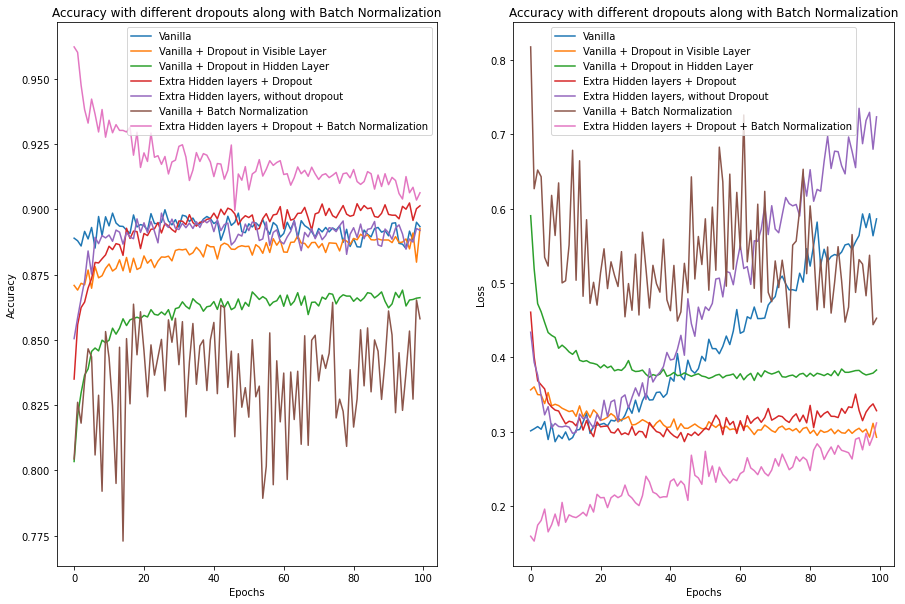

In [42]:
fig, axs = plt.subplots(1,2, figsize = (15,10))

df1['val_accuracy'].plot(ax = axs[0], label = 'Vanilla')
df2['val_accuracy'].plot(ax = axs[0], label = 'Vanilla + Dropout in Visible Layer')
df3['val_accuracy'].plot(ax = axs[0], label = 'Vanilla + Dropout in Hidden Layer')
df4['val_accuracy'].plot(ax = axs[0], label = 'Extra Hidden layers + Dropout')
df5['val_accuracy'].plot(ax = axs[0], label = 'Extra Hidden layers, without dropout')
df6['val_accuracy'].plot(ax = axs[0], label = 'Vanilla + Batch Normalization')
df7['val_accuracy'].plot(ax = axs[0], label = 'Extra Hidden layers + Dropout + Batch Normalization')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Accuracy with different dropouts along with Batch Normalization')
axs[0].legend()

df1['val_loss'].plot(ax = axs[1], label = 'Vanilla')
df2['val_loss'].plot(ax = axs[1], label = 'Vanilla + Dropout in Visible Layer')
df3['val_loss'].plot(ax = axs[1], label = 'Vanilla + Dropout in Hidden Layer')
df4['val_loss'].plot(ax = axs[1], label = 'Extra Hidden layers + Dropout')
df5['val_loss'].plot(ax = axs[1], label = 'Extra Hidden layers, without Dropout')
df6['val_loss'].plot(ax = axs[1], label = 'Vanilla + Batch Normalization')
df7['val_loss'].plot(ax = axs[1], label = 'Extra Hidden layers + Dropout + Batch Normalization')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].set_title('Accuracy with different dropouts along with Batch Normalization')
axs[1].legend()

Using the above graph, we can conclude that using batch normalization along with dropout, is giving the best validation accuracy. 

We will now evaluate the best model using our test set. 

In [43]:
model7.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 79us/step


[0.43081052870750425, 0.8842999935150146]

Therefore the accuracy on the test set for our best model = 88.4 %